# Titanic Survival Data Set
## by Ahmed Kamel Hassan


## Investigation Overview

> our goal from this investigation that to get the relationship between survival passenger with respect to the other variables in dataset and predict the factors that may affect the rate of survivors

## Dataset Overview

> The relationship between some data such as "gender, age, category" and its relationship to the extent to which the passengers survived or not, will be shown.

In [61]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [62]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('titanic.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Class of passengers versus number of non-survivors

> The better the passenger class, the fewer deaths

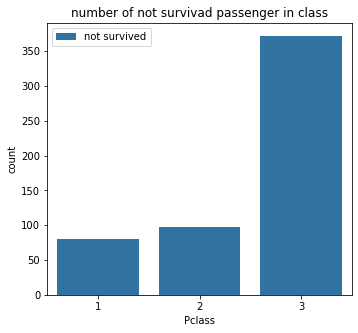

In [63]:
df2 = df[df['Survived'] == 0]
plt.figure(figsize = [12, 5])
Pclass_order = [1,2,3]
deads = ['not survived']
plt.subplot(1, 2, 1)
sb.countplot(data = df2, x = 'Pclass', hue = 'Survived', order = Pclass_order);
plt.legend(deads);
plt.title('number of not survivad passenger in class');


## Mean age of survived in each class 


> as better the passenger class (1>2>3), mean age of passengers who survived ( and also not survived ) increased, in general mean age of passengers who died (in each class) was higher than the mean age of survived passengers.

> It can be concluded that the less the passenger age, the greater the chance of survival in general whatever class of passenger.

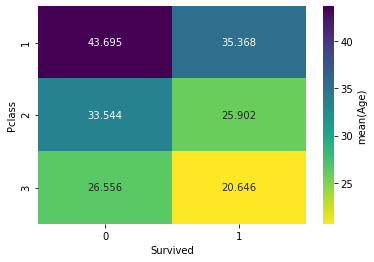

In [64]:
age_sur_class = df.groupby(['Survived', 'Pclass']).mean()['Age']
age_sur_class = age_sur_class.reset_index(name = 'Age_avg')
age_sur_class = age_sur_class.pivot(index = 'Pclass', columns = 'Survived',
                            values = 'Age_avg')
sb.heatmap(age_sur_class, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(Age)'}, cmap = 'viridis_r');

## the gender of survived passenger in each class

> number of survived females in each class is higher than survived males, in spite of the number of females in each class in less than males

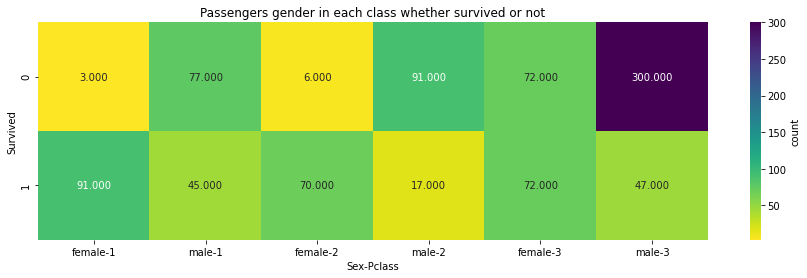

In [65]:
plt.figure(figsize=[15,4])
sex_sur_class = df.groupby(['Survived', 'Pclass', 'Sex']).size()
sex_sur_class = sex_sur_class.reset_index(name = 'count')
sex_sur_class = sex_sur_class.pivot(index = 'Survived', columns = ['Sex','Pclass'], values = 'count');
sb.heatmap(sex_sur_class, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'count'}, cmap = 'viridis_r');
plt.title('Passengers gender in each class whether survived or not');

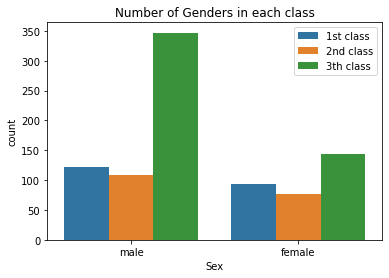

In [66]:


class_ = ['1st class','2nd class','3th class']
sb.countplot(data = df, x = 'Sex', hue = 'Pclass',)
plt.legend(class_);
plt.title('Number of Genders in each class');